In [29]:
# Basic data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
# Plotting Predicted vs Actual values
def plot_predicted_vs_actual(y_true, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, edgecolor='k', alpha=0.7)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

def plot_predicted_vs_actual_with_jitter(y_true, y_pred, jitter_amount=0.02):
    # Adding jitter: add normally distributed noise to both y_true and y_pred
    jitter_y_true = y_true + np.random.normal(0, jitter_amount, y_true.shape)
    jitter_y_pred = y_pred + np.random.normal(0, jitter_amount, y_pred.shape)

    plt.figure(figsize=(10, 6))
    plt.scatter(jitter_y_true, jitter_y_pred, edgecolor='k', alpha=0.7)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predicted vs. Actual Values with Jitter')
    plt.grid(True)
    plt.show()

# models
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression

# Data preprocessing
from sklearn.preprocessing import StandardScaler


# Model evaluation and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

def custom_accuracy_within_one_class(y_true, y_pred):
    correct = np.sum(np.abs(y_true - y_pred) <= 1)
    total = len(y_true)
    return correct / total


def plot_confusion_matrix(y_true, y_pred):
    """
    Plots a simple confusion matrix with minimal configuration.
    """
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()  # Adds a colorbar to show the scale
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix_with_histograms(y_true, y_pred):
    """
    Plots a confusion matrix with histograms for true and predicted label distributions.
    """
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    num_classes = cm.shape[0]
    
    # Create the main figure and axes
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Positioning of the main confusion matrix plot
    main_ax = plt.subplot2grid((num_classes+1, num_classes+1), (1, 0), colspan=num_classes, rowspan=num_classes)
    main_ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    
    # Plot the histograms for the rows (True Labels)
    for i in range(num_classes):
        ax_row_hist = plt.subplot2grid((num_classes+1, num_classes+1), (1+i, num_classes))
        ax_row_hist.barh([0], [np.sum(cm[i, :])], color="blue", align='center')
        ax_row_hist.set_xlim(0, np.max(np.sum(cm, axis=1)) * 1.1)  # slightly larger to accommodate all bars
        ax_row_hist.set_yticks([])
        ax_row_hist.set_xticks([])

    # Plot the histograms for the columns (Predicted Labels)
    for j in range(num_classes):
        ax_col_hist = plt.subplot2grid((num_classes+1, num_classes+1), (num_classes, j))
        ax_col_hist.bar([0], [np.sum(cm[:, j])], color="blue", align='center')
        ax_col_hist.set_ylim(0, np.max(np.sum(cm, axis=0)) * 1.1)  # slightly larger to accommodate all bars
        ax_col_hist.set_xticks([])
        ax_col_hist.set_yticks([])

    # Labeling and showing the plot
    main_ax.set_title('Confusion Matrix with Histograms')
    main_ax.set_xlabel('Predicted label')
    main_ax.set_ylabel('True label')
    plt.tight_layout()
    plt.show()


def classify_linear_probability(data):
    # Calculate mean and standard deviation
    mean = data.mean()
    std = data.std()
    
    # Define cutoffs based on your specification
    cutoffs = [
        mean - 2 * std,
        mean - 1.5 * std,
        mean - std,
        mean - (1/3) * std,
        mean + (1/3) * std,
        mean + std,
        mean + 1.5 * std,
        mean + 2 * std
    ]
    
    # Use pandas.cut to categorize the data
    categories = pd.cut(data, bins=[-np.inf] + cutoffs + [np.inf], labels=[1, 2, 3, 4, 5, 6, 7, 8, 9])    


    return categories.codes

def get_model_performance(y,y_pred, plot = False):

    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r_2 = r2_score(y, y_pred)
    within_1 = custom_accuracy_within_one_class(y, y_pred)

    # print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_train))
    # print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_pred_train))
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared (R²):", r_2)
    print("Within 1:", within_1)

    if plot:
        try:
            plot_confusion_matrix_with_histograms(y, y_pred)
        except ValueError:
            plot_predicted_vs_actual(y,y_pred)

    return rmse, r_2, within_1
    

enable %%R cells in the notebook (mostly for vizualisation)

In [30]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [31]:
# Initialize dictionaries for model metrics
performance_train = {}
performance_test = {}

In [74]:
from rural_beauty.config import predictors_DE, data_dir


predictors_full = pd.read_csv(predictors_DE, sep=",",  index_col=False, na_values = -99)


In [75]:
predictors_full.columns

Index(['dem_1', 'dem_2', 'dem_3', 'seemee_1', 'wald_1', 'natgru_2', 'heide_1',
       'sgall', 'natgru_1_2', 'wein_1', 'acker_1_2', 'stoer_1_2', 'stra_1',
       'leit_1', 'dem_1_2', 'dem_3_4', 'obst_1_4', 'wald_1_4', 'acker_1_4',
       'stoer_1', 'stoer_2', 'stoer_3', 'noveg_2', 'spfr_1', 'weanl_1_4',
       'stra_1_2', 'hemero_1', 'code_offen_1', 'code_abbau_1', 'code_salzw_1',
       'code_landwi_1', 'code_hafen_1', 'code_bebau_1', 'code_kraut_1',
       'code_feucht_1', 'code_spfr_1', 'code_stoer_1', 'code_natur_1',
       'code_strbah_1', 'code_stgrue_1', 'code_weide_1', 'code_stadt_1',
       'code_sand_1', 'code_nwald_1', 'code_acker_1', 'code_suempf_1',
       'code_gewage_1', 'code_selten_1', 'code_wanat_1', 'code_gezei_1',
       'code_flug_1', 'code_fels_1', 'code_obswei_1', 'code_gwlf_1',
       'code_lwald_1', 'code_siedl_1', 'code_seemee_1', 'code_schatt_1',
       'code_natgru_1', 'code_seen_1', 'code_noveg_1', 'code_wein_1',
       'code_wald_1', 'code_geholz_1', 'code

In [81]:
features_beauty = [
  'dem_1_2'  ,
  'dem_3_4'  ,
  'obst_1_4' ,
  'wald_1_4' ,
  'natgru_2' ,
  'acker_1_4',
  'stoer_1'  ,
  'stoer_2'  ,
  'stoer_3'  ,
  'noveg_2'  ,
  'seemee_1' ,
  'spfr_1'   ,
  'heide_1'  ,
  'weanl_1_4',
  'stra_1_2' ,
  'leit_1'   ,
  'hemero_1' ]

predictors = predictors_full.copy()
for column_name in predictors_full.columns:
    if column_name not in features_beauty:
        predictors = predictors.drop(column_name, axis = 1)


predictors = predictors.drop('hemero_1', axis = 1)

predictors.tail(5)

,seemee_1,natgru_2,heide_1,leit_1,dem_1_2,dem_3_4,obst_1_4,wald_1_4,acker_1_4,stoer_1,stoer_2,stoer_3,noveg_2,spfr_1,weanl_1_4,stra_1_2
4995,0.000000,0.0,0.0,0.00000,90.721325,91.169969,0.00251,0.304115,0.156077,0.0,0.000000,0.028645,0.0,0.0,0.101639,651.469367
4996,0.036323,0.0,0.0,2164.92300,13.199946,14.523650,0.00000,0.105855,0.596258,0.0,0.045939,0.000735,0.0,0.0,0.019672,141.616831
4997,0.000000,0.0,0.0,0.00000,80.671648,74.003581,0.00000,0.224681,0.592742,0.0,0.000000,0.000000,0.0,0.0,0.039344,427.555986
4998,0.000000,0.0,0.0,1000.39545,60.996879,74.134962,0.00000,0.323539,0.472197,0.0,0.000000,0.002086,0.0,0.0,0.137705,0.000000
4999,0.000000,0.0,0.0,448.81424,26.482313,30.195208,0.00000,0.148417,0.415196,0.0,0.008342,0.030544,0.0,0.0,0.085246,84.791877


Now the left hand side

In [82]:
from rural_beauty.config import outcome_DE
outcome = pd.read_csv(outcome_DE, sep=",",  index_col=False, na_values = -99)
outcome = outcome['schoen'].to_frame()
outcome.tail(5)

,schoen
4995,5.0
4996,4.0
4997,6.0
4998,5.0
4999,4.0


Split the Dataset

In [83]:
X    = predictors
Y    = outcome
feat = predictors.columns.values
print(X.shape)
print(Y.shape)

(5000, 16)
(5000, 1)


In [84]:
# Find rows with NaN values in X
na_rows_X = X.apply(lambda x: np.any(pd.isna(x)), axis=1)
resultx = np.where(na_rows_X)[0]

# Find rows with NaN values in Y
na_rows_Y = Y.apply(lambda x: np.any(pd.isna(x)), axis=1)
resulty = np.where(na_rows_Y)[0]

# Combine the results
result = list(set(resulty).union(set(resultx)))

print('NA rows: ' + str(result))

NA rows: [np.int64(3621)]


In [85]:
X = X.drop(X.index[result])
Y = Y.drop(Y.index[result])

print(X.shape)
print(Y.shape)

(4999, 16)
(4999, 1)


Create 4 dataset for training and testing the algorithm 

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=2024, stratify = Y)
y_train = np.ravel(Y_train)
y_test = np.ravel(Y_test)

In [87]:
# Normalizing the data
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
Y_train = scaler_Y.fit_transform(Y_train.values.reshape(-1, 1)).ravel()
Y_test = scaler_Y.transform(Y_test.values.reshape(-1, 1)).ravel()

In [88]:
rfCla = RandomForestClassifier(max_depth=10,min_samples_split= 20, oob_score = True) 
rfCla.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=20, oob_score=True)

In [89]:
# Make predictions
y_pred_train = rfCla.predict(X_train)
y_pred_test = rfCla.predict(X_test)

print("Random Forest Classification: Training Set Performance")
performance_train['RFC'] = get_model_performance(y_train, y_pred_train)

print("---------------------------------------------")

print("Random Forest Classification: Test Set Performance")
performance_test['RFC'] = get_model_performance(y_train, y_pred_train)

Random Forest Classification: Training Set Performance
Root Mean Squared Error (RMSE): 0.5974468822505012
R-squared (R²): 0.8356569775088781
Within 1: 0.9671868747499
---------------------------------------------
Random Forest Classification: Test Set Performance
Root Mean Squared Error (RMSE): 0.5974468822505012
R-squared (R²): 0.8356569775088781
Within 1: 0.9671868747499


now a linear regression 

In [90]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)

# Retrieve the estimated coefficients
coefficients = pd.DataFrame({
    'Feature': predictors.columns,
    'Coefficient': linReg.coef_
})

coefficients = coefficients.sort_values(by = 'Coefficient', key = lambda x: abs(x), ascending = False) 

# If you also need the intercept:
intercept = linReg.intercept_

print("Intercept:", intercept)
print(coefficients.round(4))


Intercept: 4.9191676670668265
      Feature  Coefficient
4     dem_1_2       0.3879
7    wald_1_4       0.3582
8   acker_1_4      -0.3074
9     stoer_1      -0.2955
5     dem_3_4       0.2569
11    stoer_3      -0.1594
15   stra_1_2      -0.1493
12    noveg_2      -0.1369
0    seemee_1       0.1128
13     spfr_1      -0.1113
2     heide_1       0.0928
6    obst_1_4       0.0759
10    stoer_2      -0.0685
3      leit_1      -0.0651
14  weanl_1_4      -0.0584
1    natgru_2       0.0196


In [91]:
# Make predictions
y_pred_train = linReg.predict(X_train)
y_pred_test = linReg.predict(X_test)

print("Linear Probability: Training Set Performance")
performance_train['LMR'] = get_model_performance(y_train, y_pred_train)
print("---------------------------------------------")
print("Linear Probability: Test Set Performance")
performance_test['LMR'] = get_model_performance(y_test, y_pred_test)

Linear Probability: Training Set Performance
Root Mean Squared Error (RMSE): 0.6706475353852354
R-squared (R²): 0.7929184831251823
Within 1: 0.8879551820728291
---------------------------------------------
Linear Probability: Test Set Performance
Root Mean Squared Error (RMSE): 0.6658937675689207
R-squared (R²): 0.7958932611338047
Within 1: 0.8892


In [44]:
# now classify them like they did in the paper


In [92]:
y_pred_train = linReg.predict(X_train)
y_pred_test = linReg.predict(X_test)

y_pred_train_class = classify_linear_probability(y_pred_train)
y_pred_test_class = classify_linear_probability(y_pred_test)

print("Linear Probability Sigma Binning: Training Set Performance")
performance_train['LMC'] = get_model_performance(y_train, y_pred_train_class)
print("---------------------------------------------")
print("Linear Probability Sigma Binning: Test Set Performance")
performance_test['LMC'] = get_model_performance(y_test, y_pred_test_class)

Linear Probability Sigma Binning: Training Set Performance
Root Mean Squared Error (RMSE): 1.1641916237693613
R-squared (R²): 0.37597554128090815
Within 1: 0.8307322929171669
---------------------------------------------
Linear Probability Sigma Binning: Test Set Performance
Root Mean Squared Error (RMSE): 1.153603051313579
R-squared (R²): 0.3874236360132005
Within 1: 0.836


In [93]:
print("Training Set Performance:")
for model, metrics in performance_train.items():
    rmse, r_squared, within_1 = metrics
    print(f"Model: {model}")
    print(f"RMSE: {rmse:.2f}, R^2: {100*r_squared:.2f}%, Within 1 Class: {100*within_1:.2f}%")

print("Testing Set Performance:")
for model, metrics in performance_test.items():
    rmse, r_squared, within_1 = metrics
    print(f"Model: {model}")
    print(f"RMSE: {rmse:.2f}, R^2: {100*r_squared:.2f}%, Within 1 Class: {100*within_1:.2f}%")

Training Set Performance:
Model: RFC
RMSE: 0.60, R^2: 83.57%, Within 1 Class: 96.72%
Model: LMR
RMSE: 0.67, R^2: 79.29%, Within 1 Class: 88.80%
Model: LMC
RMSE: 1.16, R^2: 37.60%, Within 1 Class: 83.07%
Testing Set Performance:
Model: RFC
RMSE: 0.60, R^2: 83.57%, Within 1 Class: 96.72%
Model: LMR
RMSE: 0.67, R^2: 79.59%, Within 1 Class: 88.92%
Model: LMC
RMSE: 1.15, R^2: 38.74%, Within 1 Class: 83.60%


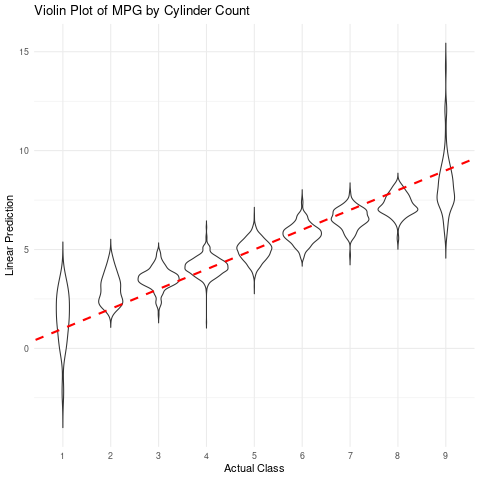

In [94]:
%%R -i y_test,y_pred_test,y_pred_test_class

d <- data.frame(y_test, y_pred_test, y_pred_test_class)

library(ggplot2)
ggplot(d, aes(factor(y_test), y_pred_test)) +
  geom_violin(trim=FALSE) +
  labs(title="Violin Plot of MPG by Cylinder Count",
       x="Actual Class",
       y="Linear Prediction") +
  geom_abline(slope=1, intercept=0, color="red", linetype="dashed", size=1) +
  theme_minimal()


In [95]:
from matplotlib.colors import ListedColormap

def plot_predicted_vs_actual_colored(y_true, y_pred, categories):
    # Create a colormap from green to blue
    cmap = ListedColormap(np.linspace([0, 1, 0], [0, 0, 1], 9))  # Ramping from green to blue

    plt.figure(figsize=(10, 6))
    
    # Scatter plot with colors based on 'categories'
    scatter = plt.scatter(y_true, y_pred, c=categories, cmap=cmap, edgecolor='k', alpha=0.7)
    
    # Adding a colorbar
    plt.colorbar(scatter, label='Category')
    
    # Plot the line of perfect prediction
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predicted vs. Actual Values')
    plt.show()

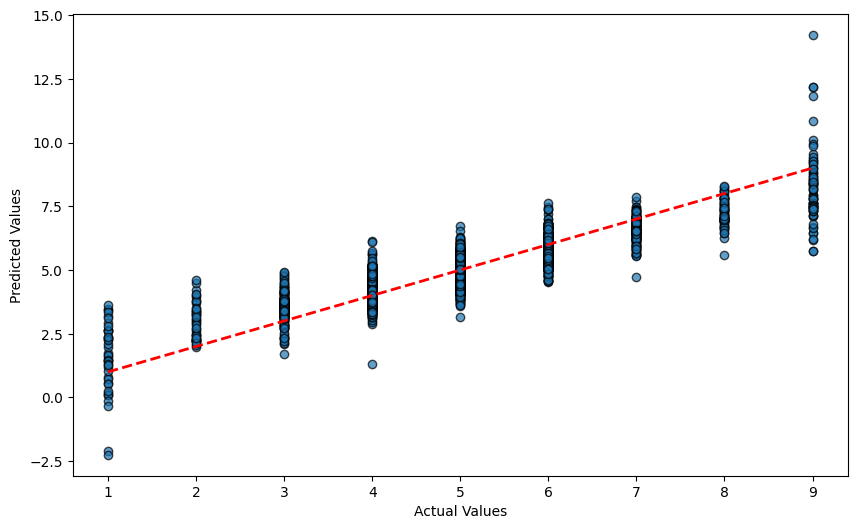

In [96]:
plot_predicted_vs_actual(y_test,y_pred_test)

In [97]:
X_train[np.argmin(y_pred_test),:]


array([-0.12883181, -0.14027921, -0.06818691, -0.29699033,  1.64973198,
        1.78744116, -0.2364742 ,  2.29287703, -1.5362948 , -0.22047599,
       -0.33347162, -0.52136903, -0.05190309, -0.12537402, -0.70178379,
       -1.01267058])

In [98]:
X_train[np.argmin(y_pred_test)-1,:]

array([-0.12883181, -0.14027921, -0.06818691,  0.27409906, -0.71924784,
       -0.81909746, -0.2364742 , -1.37796394,  0.30586749,  4.17637396,
        5.71520936,  3.10123321, -0.05190309, -0.12537402, -0.09845824,
        1.91922918])